In [1]:
import numpy as np
from typing import Iterable, Union
import matplotlib.pyplot as plt

In [13]:
class Vec2:
    def __init__(self, x: float, y: float):
        self.__x = x
        self.__y = y

    @property
    def x(self) -> float:
        return self.__x

    @property
    def y(self) -> float:
        return self.__y

    @x.setter
    def x(self, x: float):
        self.__x = float(x)

    @y.setter
    def y(self, y: float):
        self.__y = float(y)

    def __getitem__(self, index: int) -> float:
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise IndexError("index 0, 1 are only available")

    def __add__(self, other: "Vec2") -> "Vec2":
        return Vec2(self.x + other.x, self.y + other.y)

    def __mul__(self, other: float) -> "Vec2":
        return Vec2(self.x * other, self.y * other)

    def __rmul__(self, other: float) -> "Vec2":
        return self.__mul__(other)

    def __sub__(self, other: "Vec2") -> "Vec2":
        return self.__add__(other * -1)

    def __truediv__(self, other: float) -> "Vec2":
        return self.__mul__(1 / other)

    def dot(self, other: "Vec2") -> float:
        return self.x * other.x + self.y * other.y

    def rotate_rad(self, angle: float) -> "Vec2":
        return Vec2(
            self.x * np.cos(angle) - self.y * np.sin(angle),
            self.x * np.sin(angle) + self.y * np.cos(angle),
        )

    def rotate_deg(self, angle: float) -> "Vec2":
        return self.rotate_rad(np.deg2rad(angle))

    @property
    def norm(self) -> float:
        return np.sqrt(self.dot(self))

    @property
    def theta(self) -> float:
        return np.arctan2(self.y, self.x)

    @property
    def theta_deg(self) -> float:
        return np.rad2deg(self.theta)

    @property
    def unit(self) -> "Vec2":
        return self / self.norm

    def distance(self, other: "Vec2") -> float:
        return (self - other).norm

    def angle_between_rad(self, other: "Vec2") -> float:
        return np.arccos(self.dot(other) / (self.norm * other.norm))

    def angle_between_deg(self, other: "Vec2") -> float:
        return np.rad2deg(self.angle_between_rad(other))


class Vec2Arr(list):
    def __init__(self, arr: np.ndarray | Iterable[Vec2]):
        if isinstance(arr, np.ndarray):
            if arr.shape[1] != 2:
                raise ValueError("arr must be a 2D array")
            super().__init__([Vec2(x, y) for x, y in arr])
        elif isinstance(arr, Iterable) and all([isinstance(v, Vec2) for v in arr]):
            super().__init__(arr)
        else:
            TypeError("arr must be a 2D array or an iterable of Vec2")

    def append(self, vec: Vec2):
        if not isinstance(vec, Vec2):
            raise TypeError("vec must be a Vec2")
        super().append(vec)

    def append_tail(self, vec: Vec2):
        self.append(self[-1] + vec)


    def offset(self, distance: float, *, direction: str = "lefthand") -> "Vec2Arr":
        """offset all points by distance"""
        angle = np.pi / 2 if direction == "lefthand" else -np.pi / 2
        ret = []
        for i in range(len(self)):
            j = max(i - 1, 0)
            k = min(i + 1, len(self) - 1)
            ret.append(self[i] + (self[k] - self[j]).unit.rotate_rad(angle) * distance)
        return Vec2Arr(ret)

In [11]:
v = Vec2(1, 1)
print(v.x, v.y, v.norm, v.theta_deg, v.unit)

1 1 1.4142135623730951 45.0 <__main__.Vec2 object at 0x7f7e2d7827a0>


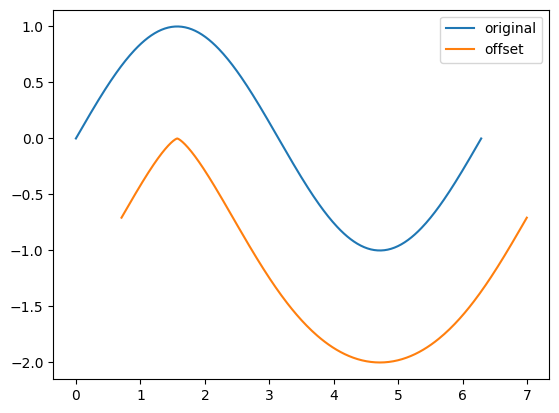

In [14]:
x = np.linspace(0, 2 * np.pi, 361)
y = np.sin(x)
arr = Vec2Arr(np.vstack([x, y]).T)
offset_arr = arr.offset(-1, direction="lefthand")
nda = np.array([[v.x, v.y] for v in offset_arr])

plt.plot(x, y, label="original")
plt.plot(nda[:, 0], nda[:, 1], label="offset")
plt.legend()